# **Business Case: Walmart - Confidence Interval and CLT:**

#**1. Defining Problem Statement and Analyzing basic metrics (10 Points)**

##**1.a.Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary**

**About Walmart**
 Walmart is an American multinational retail corporation that operates a chain of supercenters,
 discount departmental stores, and grocery stores from the United States. Walmart has more
 than 100 million customers worldwide.

 #**Problem Statement**

 The Management team at Walmart Inc. wants to analyze the customer purchase behavior
 (specifically, purchase amount) against the customer’s gender and the various other factors to
 help the business make better decisions. They want to understand if the spending habits differ
 between male and female customers: Do women spend more on Black Friday than men?
 (Assume 50 million customers are male and 50 million are female).

 #**Dataset**

 The company collected the transactional data of customers who purchased products from the
 Walmart Stores during Black Friday. The dataset has the following features:


 ● User_ID: User ID

 ● Product_ID: Product ID

 ● Gender:Sex of User

 ● Age:Age in bins

 ● Occupation: Occupation(Masked)

● City_Category: Category of the City (A,B,C)

 ● StayInCurrentCityYears: Number of years stay in current city

 ● Marital_Status: Marital Status

 ● ProductCategory: Product Category (Masked)

 ● Purchase: Purchase Amount

**Importing Required Libraries:**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, Markdown

**Uploading the Dataset:**

In [72]:
df = pd.read_csv("walmart_data.csv")

**Top 5 frames of the dataset**

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


**Checking information about the dataset:**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Checking for shape of the Dataset:**

In [9]:
df.shape

(550068, 10)

**Checking for data types of all attributes:**

In [10]:
print("Data Types    (Before Conversion)\n", df.dtypes)

Data Types    (Before Conversion)
 User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


### **Insights:**

- From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.


- Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

**Conversion of categorical attributes to 'category'**

In [11]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


**Statistical Summary of the data:**

In [12]:
# statisctical summary of object type columns

df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


###**Insights:**

**1. User_ID** - Among `5,50,068` transactions there are `5891` unique user_id, indicating same customers buying multiple products.

**2. Product_ID** - Among `5,50,068` transactions there are `3631` unique products,with the product having the code `P00265242` being the `highest seller`, with a maximum of `1,880 units` sold.

**3. Gender** - Out of `5,50,068` transactions, 4,14,259 `(nearly 75%)` were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

**4. Age** - We have `7` unique age groups in the dataset. `26 - 35` Age group has maximum of `2,19,587` transactions. We will analyse this feature in detail in future

**5. Stay_In_Current_City_Years** - Customers with `1` year of stay in current city accounted to maximum of `1,93,821` transactions among all the other customers with (0,2,3,4+) years of stay in current city

**6. Marital_Status** - `59%` of the total transactions were done by `Unmarried Customers` and `41%` by `Married Customers`.

In [13]:
# statisctical summary of numerical data type columns

df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


###**Insights:**

`The purchase amounts` vary widely, with the minimum recorded purchase being `$12` and the maximum reaching `$23961`. The `median` purchase amount of `$8047` is notably lower than the `mean` purchase amount of `$9264`, indicating a `right-skewed distribution` where a few high-value purchases pull up the mean

**Duplicate Detection:**

In [14]:
df.duplicated().value_counts()

,count
False,550068


###**Insights:**

- There are no duplicate entries in the dataset

##**1.b:Non-Graphical Analysis: Value counts and unique attributes**


##**1)Value Counts of the attributes:**

In [15]:
# For User_ID
User_ID = df['User_ID'].value_counts().reset_index()
User_ID.columns = ['User_ID', 'Count']
User_ID.head()

,User_ID,Count
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823


In [16]:
# For Product_ID

Product_ID = df['Product_ID'].value_counts().reset_index()
Product_ID.columns = ['Product_ID', 'Count']
Product_ID.head()


,Product_ID,Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470


In [17]:
# For Age

Age = df['Age'].value_counts().reset_index()
Age.columns = ['Age', 'Count']
Age.head()

,Age,Count
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501


In [18]:
# For Gender

Gender = df['Gender'].value_counts().reset_index()
Gender.columns = ['Gender', 'Count']
Gender.head()

,Gender,Count
0,M,414259
1,F,135809


In [19]:
# For Occupation

Occupation = df['Occupation'].value_counts().reset_index()
Occupation.columns = ['Occupation', 'Count']
Occupation.head()

,Occupation,Count
0,4,72308
1,0,69638
2,7,59133
3,1,47426
4,17,40043


In [20]:
# For City_Category

City_Category = df['City_Category'].value_counts().reset_index()
City_Category.columns = ['City_Category', 'Count']
City_Category.head()

,City_Category,Count
0,B,231173
1,C,171175
2,A,147720


In [21]:
# For Stay_In_Current_City_Years

Stay_In_Current_City_Years = df['Stay_In_Current_City_Years'].value_counts().reset_index()
Stay_In_Current_City_Years.columns = ['Stay_In_Current_City_Years', 'Count']
Stay_In_Current_City_Years.head()

,Stay_In_Current_City_Years,Count
0,1,193821
1,2,101838
2,3,95285
3,4+,84726
4,0,74398


In [22]:
# For Marital_Status

Marital_Status = df['Marital_Status'].value_counts().reset_index()
Marital_Status.columns = ['Marital_Status', 'Count']
Marital_Status.head()

,Marital_Status,Count
0,0,324731
1,1,225337


In [23]:
# For Product_Category

Product_Category = df['Product_Category'].value_counts().reset_index()
Product_Category.columns = ['Product_Category', 'Count']
Product_Category.head()

,Product_Category,Count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864


In [24]:
# For Purchase

Purchase = df['Purchase'].value_counts().reset_index()
Purchase.columns = ['Purchase', 'Count']
Purchase.head()

,Purchase,Count
0,7011,191
1,7193,188
2,6855,187
3,6891,184
4,6960,183


##**2) Unique Values in the Attributes:**

In [25]:
# Display unique values for each column in the dataset
for col in df.columns:
    unique_vals = df[col].unique()
    num_unique = df[col].nunique()

    print(f"\n🔹 Column: {col}")
    print(f"Total Unique Values: {num_unique}")

    # Display first few unique values to avoid flooding the output
    if num_unique <= 20:
        print(f"Unique Values: {list(unique_vals)}")
    else:
        print(f"Sample Unique Values: {list(unique_vals[:10])} ...")


🔹 Column: User_ID
Total Unique Values: 5891
Sample Unique Values: [1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000007, 1000008, 1000009, 1000010] ...

🔹 Column: Product_ID
Total Unique Values: 3631
Sample Unique Values: ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', 'P00193542', 'P00184942', 'P00346142', 'P0097242', 'P00274942'] ...

🔹 Column: Gender
Total Unique Values: 2
Unique Values: ['F', 'M']

🔹 Column: Age
Total Unique Values: 7
Unique Values: ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

🔹 Column: Occupation
Total Unique Values: 21
Sample Unique Values: [10, 16, 15, 7, 20, 9, 1, 12, 17, 0] ...

🔹 Column: City_Category
Total Unique Values: 3
Unique Values: ['A', 'C', 'B']

🔹 Column: Stay_In_Current_City_Years
Total Unique Values: 5
Unique Values: ['2', '4+', '3', '1', '0']

🔹 Column: Marital_Status
Total Unique Values: 2
Unique Values: [0, 1]

🔹 Column: Product_Category
Total Unique Values: 20
Unique Values: [3, 1, 12, 8, 5, 4, 2, 6

##**1.c.Visual Analysis - Univariate & Bivariate**:


###**Univariate Analysis:**

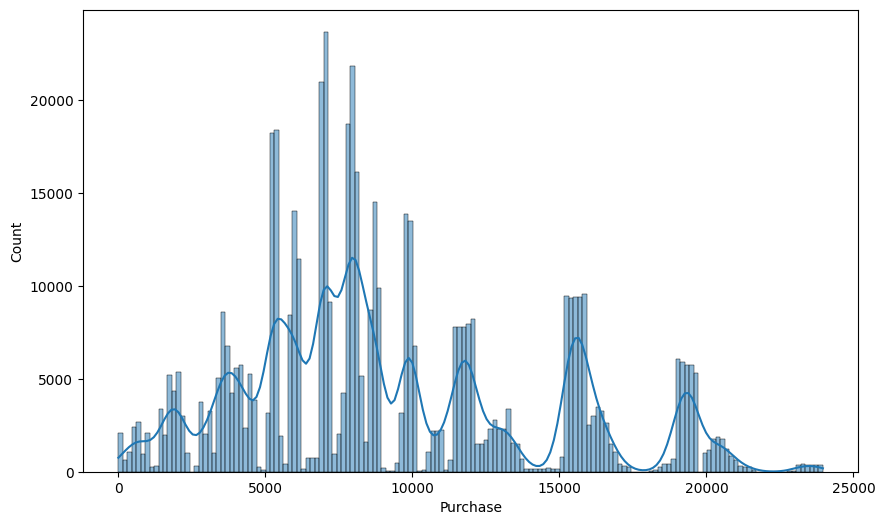

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

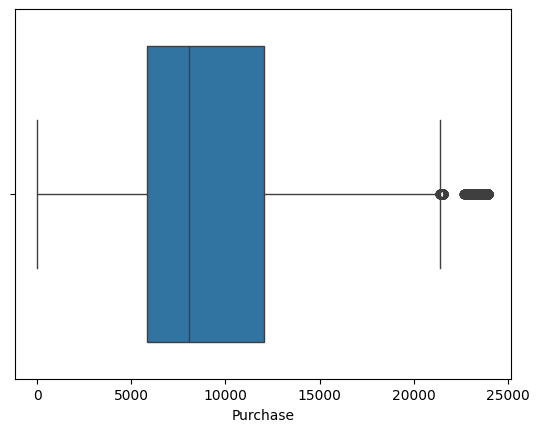

In [27]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

#### Observation
- Purchase is having outliers

#### Understanding the distribution of data for the categorical variables
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

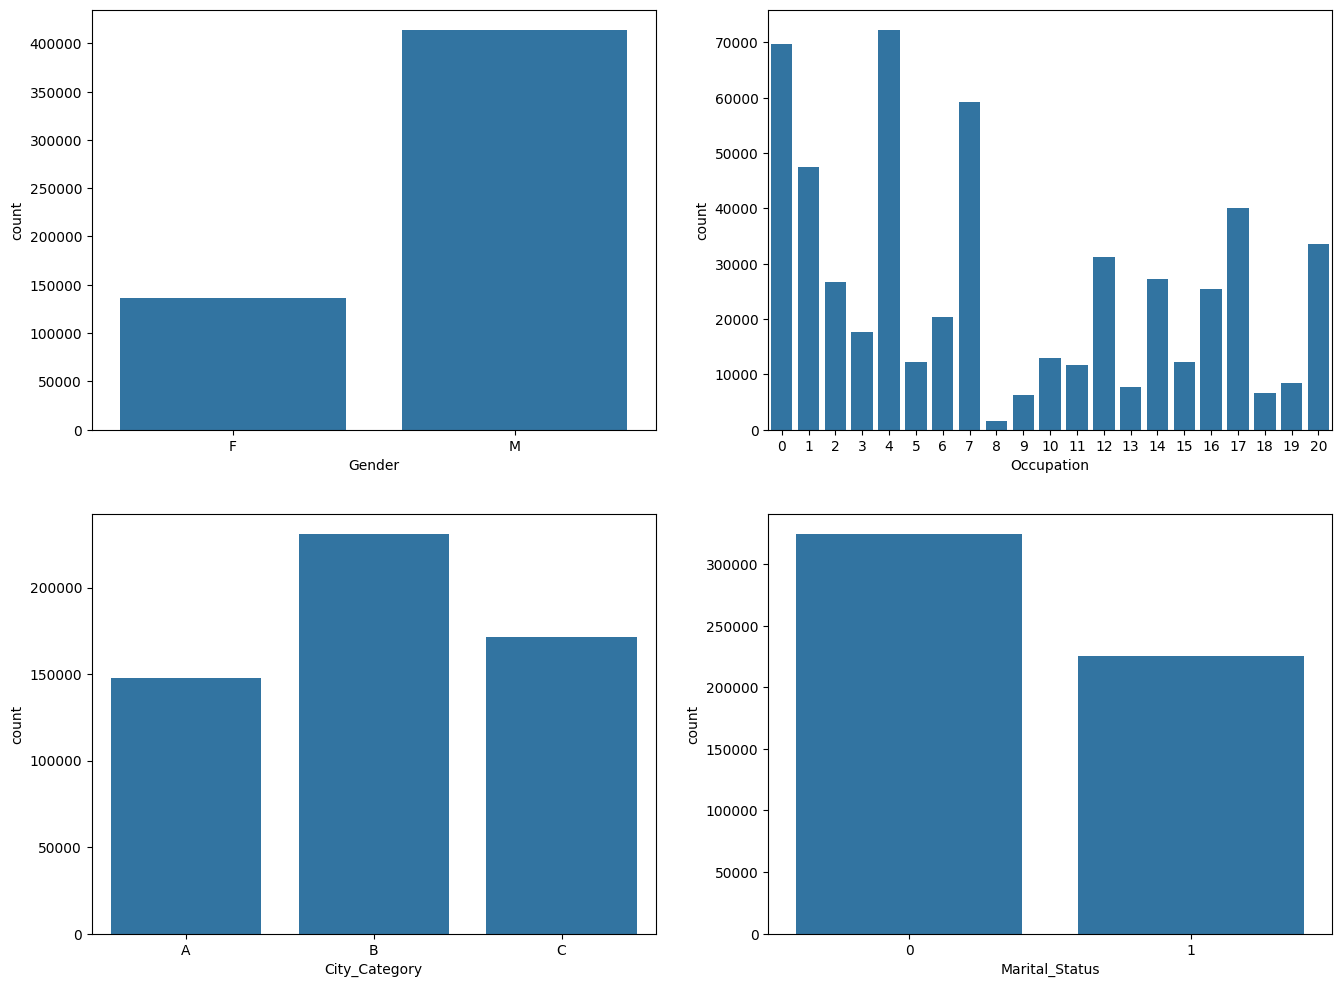

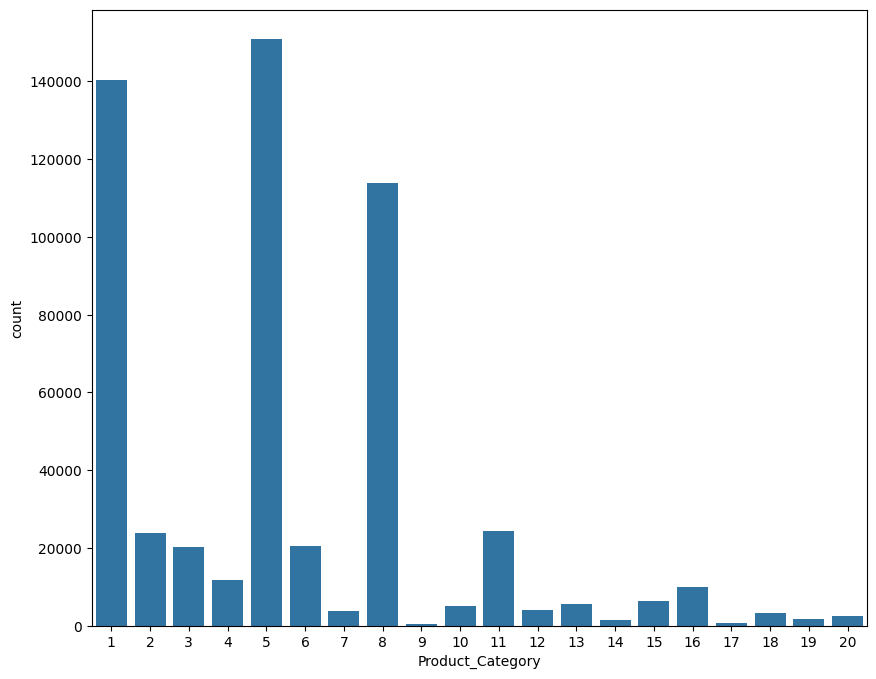

In [28]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

#### Observations
- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

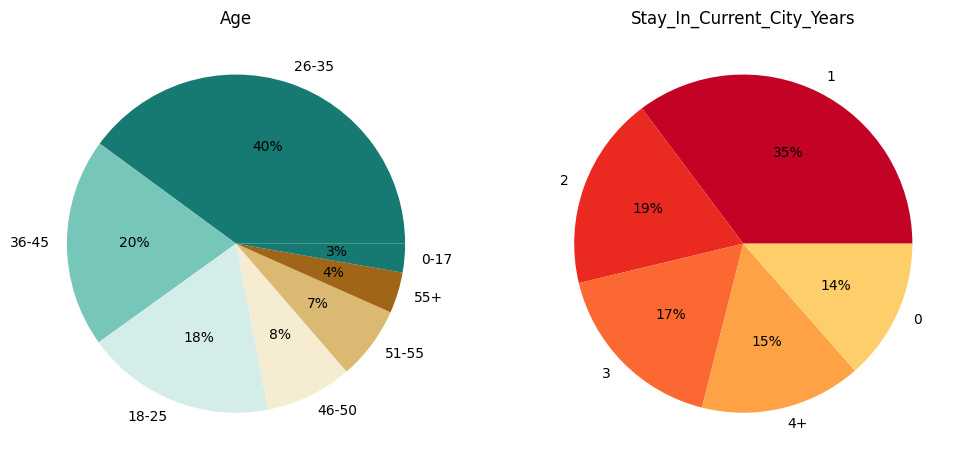

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

#### Observations
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years, 15% from 4 years+, 14% are new to city

###**Bivariate Analysis:**

/tmp/ipython-input-2244127360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
/tmp/ipython-input-2244127360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
/tmp/ipython-input-2244127360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
/tmp/ipython-input-2244127360.py:9: FutureWarning: 

Passing `palette` without ass

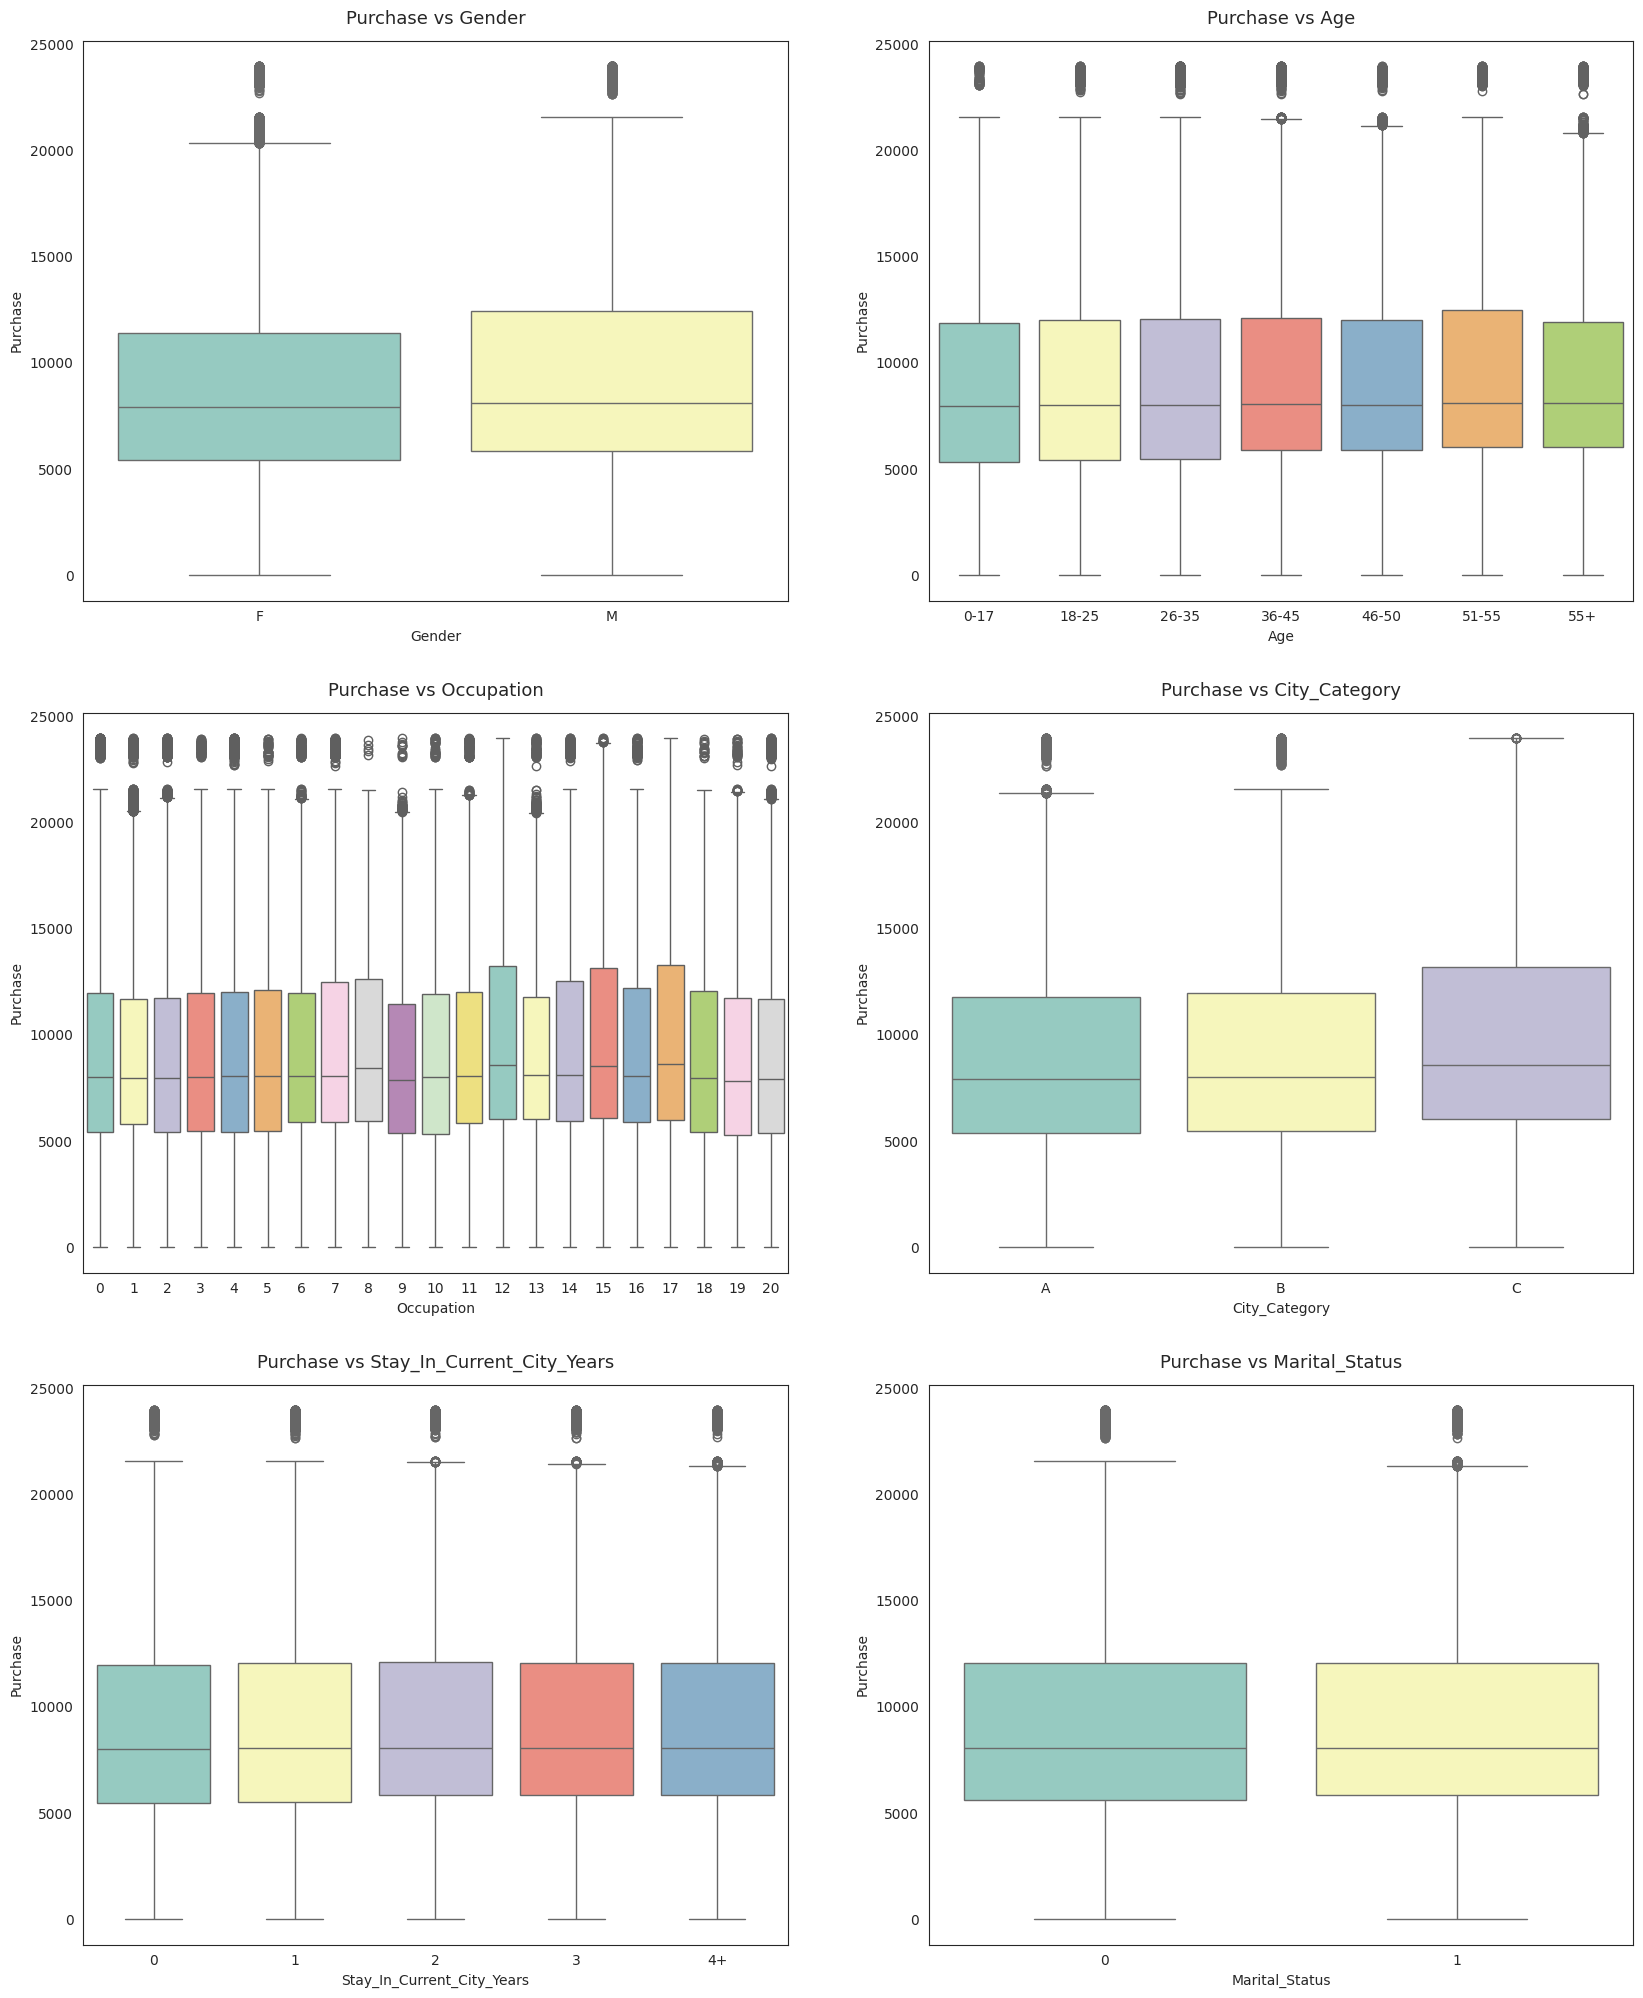

In [30]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


/tmp/ipython-input-2980221479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')


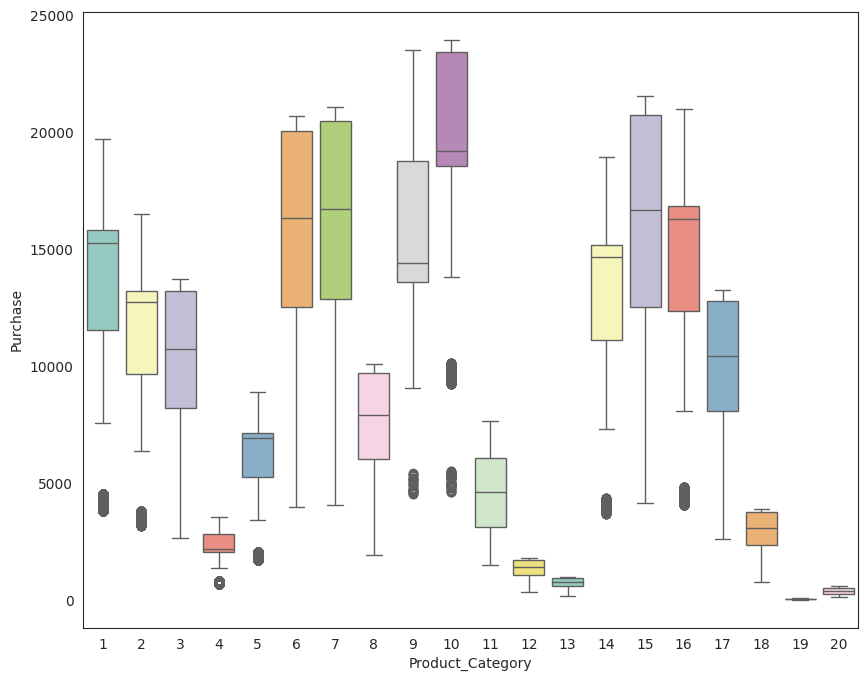

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

###**Multivariate Analysis:**

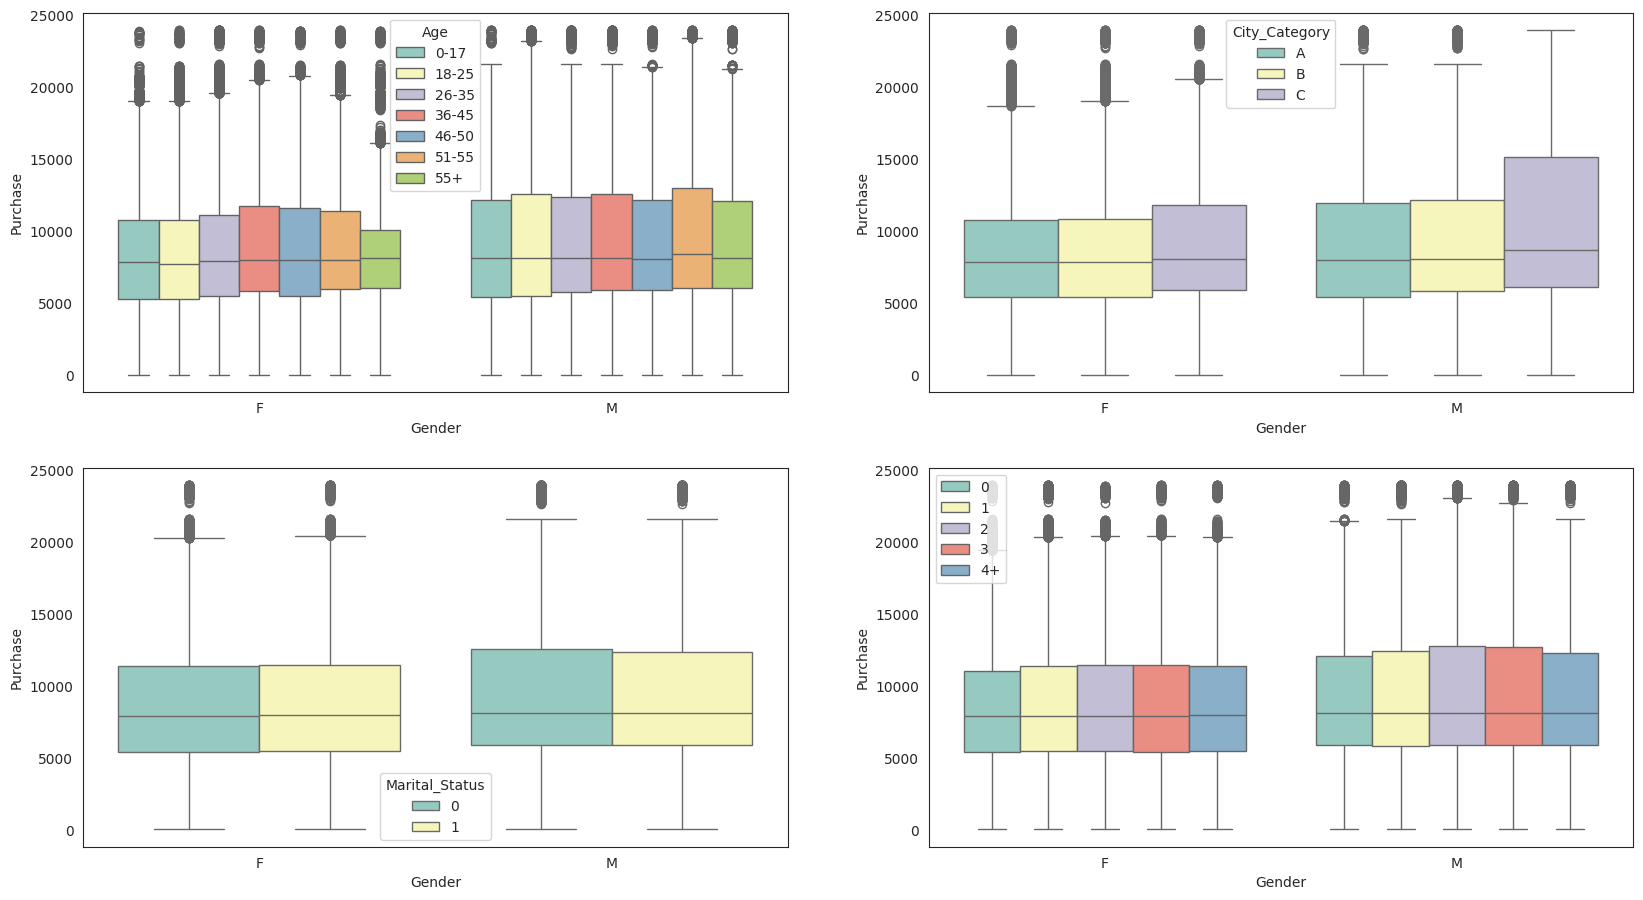

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

###**Heatmap:**

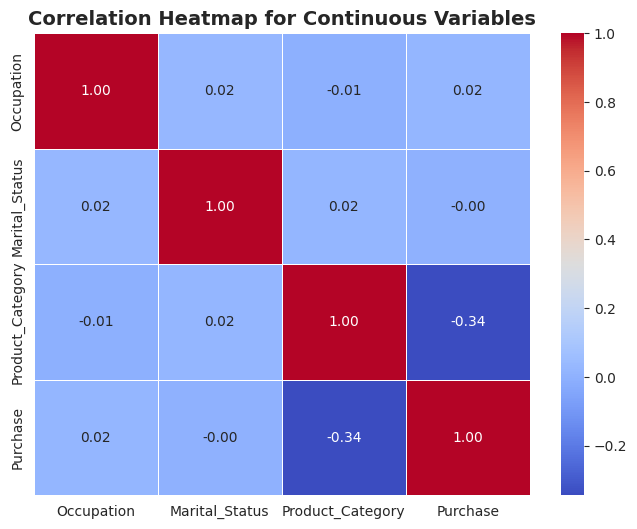

In [33]:
# Select continuous variables
continuous_vars = ['Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

# Compute correlation matrix
corr_matrix = df[continuous_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Continuous Variables", fontsize=14, fontweight='bold')
plt.show()

###**Pairplot:**

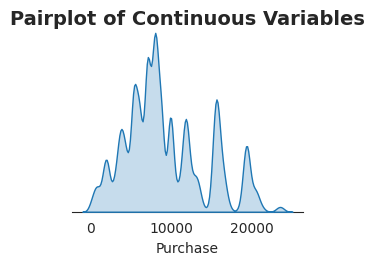

In [34]:
# Pairplot for continuous variables
sns.pairplot(df[continuous_vars], diag_kind='kde', corner=True,
             plot_kws={'alpha':0.5, 's':20, 'edgecolor':'k'})
plt.suptitle("Pairplot of Continuous Variables", y=1.02, fontsize=14, fontweight='bold')
plt.show()

#**2. Missing Value & Outlier Detection (10 Points)**

##**2.1 Missing Values Detection:**

🔍 Missing Value Summary:
                            Missing Values  Missing (%)
User_ID                                  0          0.0
Product_ID                               0          0.0
Gender                                   0          0.0
Age                                      0          0.0
Occupation                               0          0.0
City_Category                            0          0.0
Stay_In_Current_City_Years               0          0.0
Marital_Status                           0          0.0
Product_Category                         0          0.0
Purchase                                 0          0.0


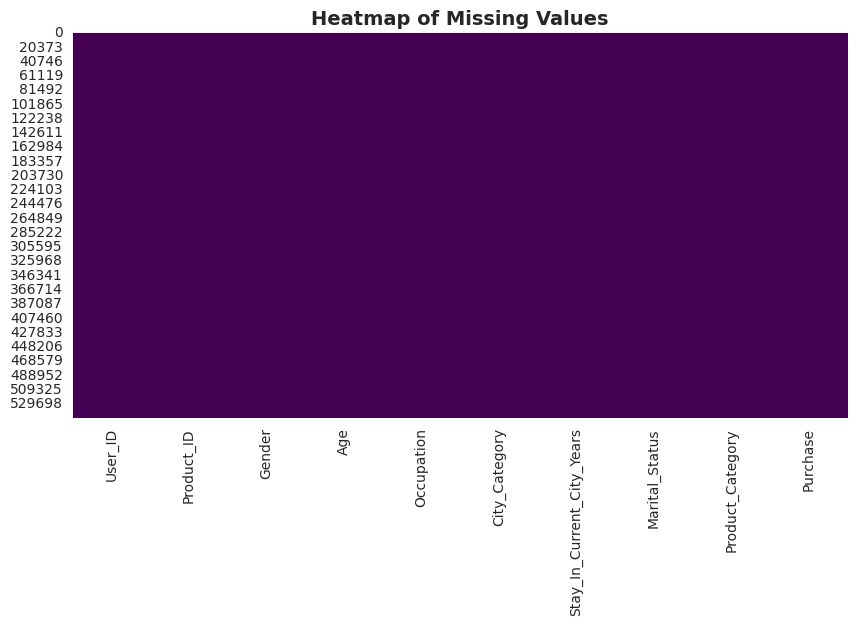

In [35]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)

# Display in percentage
missing_percent = (df.isnull().mean() * 100).round(2)

# Combine results into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing (%)': missing_percent
})

print("🔍 Missing Value Summary:")
print(missing_summary)

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values", fontsize=14, fontweight='bold')
plt.show()


**Insights on Missing Values:**

If missing_summary shows 0% missing values for all columns → dataset is complete and clean.

If any feature has >10% missing → you may need to impute or drop those depending on importance.

A clean missing-value heatmap (all yellow/green bars aligned) confirms no missingness pattern — i.e., data collection was consistent.

##**2.2. Outlier Detection**

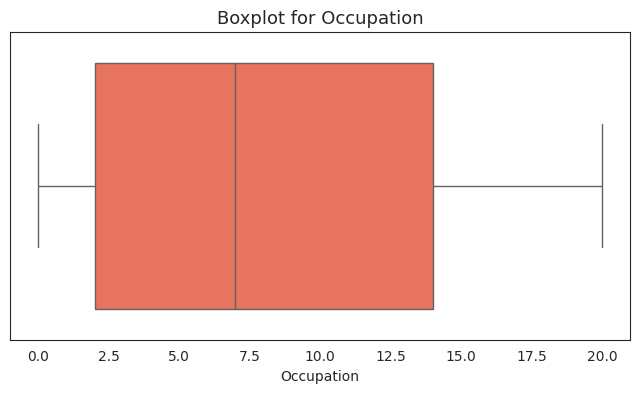

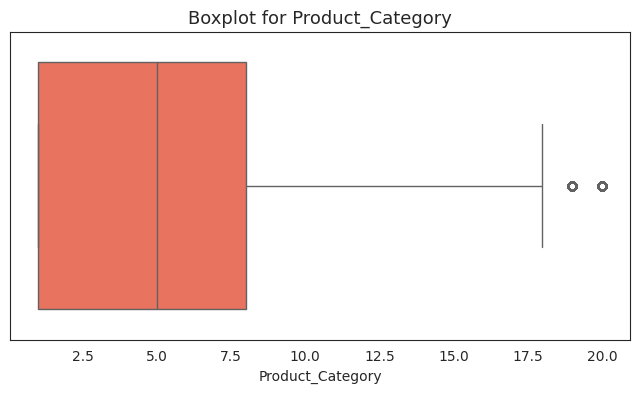

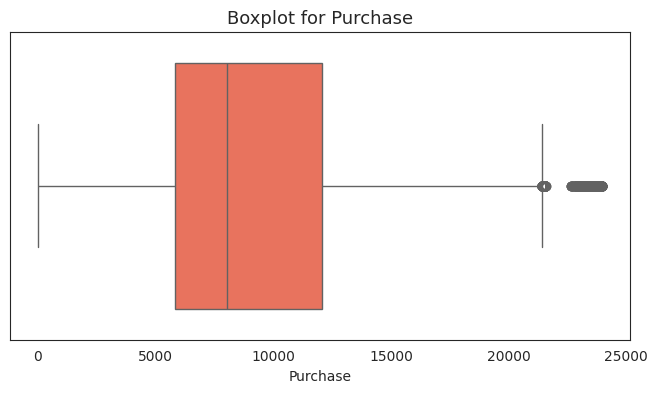

In [36]:
##A.Visual Outlier Detection


# Continuous variables to check
continuous_vars = ['Occupation', 'Product_Category', 'Purchase']

for col in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='tomato')
    plt.title(f"Boxplot for {col}", fontsize=13)
    plt.xlabel(col)
    plt.show()


###**Insights on Outliers:**

Purchase:

Likely has right-side outliers (customers with very high purchase amounts).

These outliers are important, as they might represent premium customers or bulk orders.

Product_Category:

Outliers may indicate rare categories with very few high-value purchases.

Worth investigating if these products are niche or luxury items.

Occupation:

Typically discrete, so minor outliers are not impactful — they represent valid occupational codes.

Business Decision:

Don’t remove Purchase outliers immediately; they may represent high-value behavior.

Instead, treat them separately during modeling (e.g., cap or log-transform if necessary).

#**3.Business Insights based on Non- Graphical and Visual Analysis(10 Points):**

**a. Comments on the Range of Attributes:**

Purchase values range roughly between ₹0 and ₹20,000, with an average purchase around ₹9,000–₹10,000.
→ Indicates a moderate spending tendency, suggesting most customers make medium-value purchases.

Occupation ranges from 0 to 20, representing different occupational codes — implying diverse customer profiles.

Product_Category has values mostly between 1 and 20, but a few categories dominate (like 1, 5, 8, 15).
→ Concentration of sales in limited product categories.

Marital_Status is binary (0 or 1), indicating nearly equal participation from married and unmarried shoppers.

Stay_In_Current_City_Years categories like “1”, “2”, “3”, “4+” show stable residency, possibly influencing loyalty.

**b. Comments on the Distribution and Relationships Between Variables:**

Univariate Distributions (Continuous Variables)

Purchase is right-skewed, meaning more low-to-medium purchase values and fewer high-value purchases.

Occupation shows a discrete, uneven spread — a few occupations dominate the dataset, likely contributing more to sales.

Product_Category distribution is highly skewed, implying few categories are significantly more popular.

Marital_Status is evenly distributed, indicating balanced customer demographics.

Categorical Variables

Gender: Males dominate the dataset (around 75%), suggesting male customers are more active buyers.

Age Group: The 26–35 age group is the largest segment, showing young adults are key customers.

City_Category: Category B cities contribute the most, hinting that Tier-2 cities drive Walmart sales.

**c. Comments for Each Univariate and Bivariate Plot
Univariate Plots:**

Histograms / Distplots:

Showed Purchase and Product_Category are skewed; not all products or price ranges are equally popular.

The Occupation histogram shows a few high-frequency occupation codes, implying potential segmentation opportunities.

Boxplots:

Revealed outliers in Purchase values (some customers spend significantly more).

Product_Category boxplot highlighted categories with wider spread, showing variability in popularity.

Bivariate Plots:

Correlation & Pairplots:

Correlation heatmap showed weak correlations between continuous variables — meaning no strong linear dependence among Purchase, Occupation, or Product_Category.

Pairplot confirmed Purchase doesn’t vary linearly with Occupation or Product_Category, suggesting other factors like Age or City_Category have stronger influence.

Visuals (like Age vs Purchase or Gender vs Purchase boxplots) typically show males and younger customers (26–35) spending more.

#**4.Answering questions (50 Points):**

##**4.a.Are women spending more money per transaction than men? Why or Why not(10 Points)**

**Average amount spend per customer for Male and Female**

In [37]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

/tmp/ipython-input-421224929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()


,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [38]:
# Gender wise value counts in avg_amt_df
avg_amt_df = amt_df['Gender'].value_counts()
avg_amt_df

,count
Gender,
F,5891
M,5891


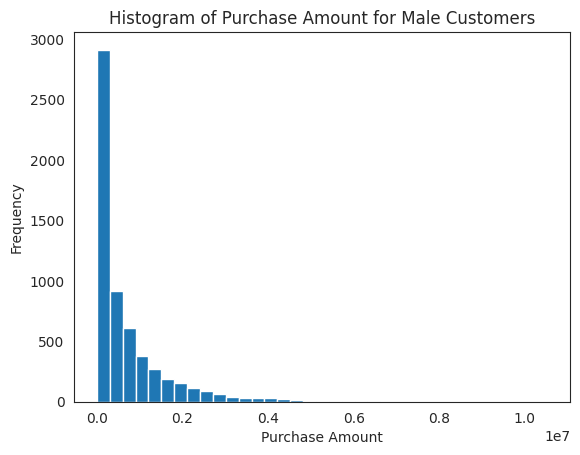

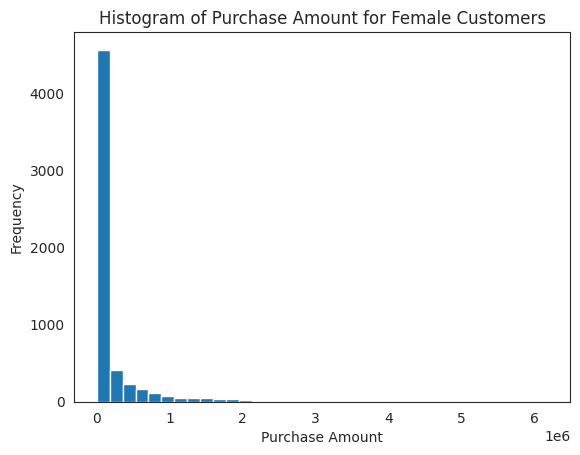

In [39]:
# histogram of average amount spent for each customer - Male & Female
plt.figure()  # Create a new figure

plt.hist(amt_df[amt_df['Gender']=='M']['Purchase'], bins=35)
plt.title("Histogram of Purchase Amount for Male Customers")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure()  # Create a new figure

plt.hist(amt_df[amt_df['Gender']=='F']['Purchase'], bins=35)
plt.title("Histogram of Purchase Amount for Female Customers")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

In [40]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))


Average amount spend by Male customers: 663653.05
Average amount spend by Female customers: 201363.54


**Observation**

Male customers spend more money than female customers

1. The number of total males (4225) is greater than number of total females (1666).
2. Average amount spend by Male customers (925344.40) is greater than Average amount spend by Female customers(712024.39).

##**4.b.Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)**

**Sample Size:**

male_sample_size = 3000 <br>
female_sample_size = 1500

In [41]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [42]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

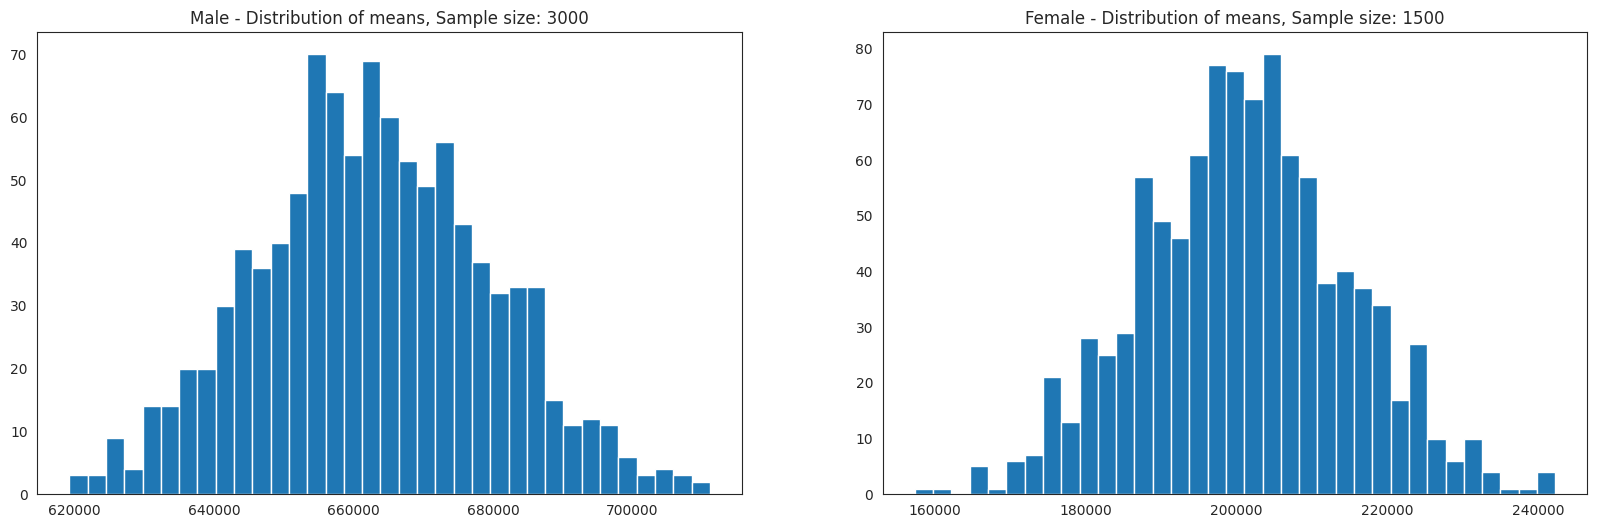

In [43]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [44]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 662884.26
Population mean - Mean of sample means of amount spend for Female: 201000.62

Male - Sample mean: 663653.05 Sample std: 933096.80
Female - Sample mean: 201363.54 Sample std: 535828.17


**Observation:**

Now using the **Central Limit Theorem** for the **population** we can say that:
1. Average amount spend by male customers is **925344.40**
2. Average amount spend by female customers is **712024.39**

**Sample Size:**
    
male_sample_size = 300 <br>
female_sample_size = 150

In [45]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [46]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

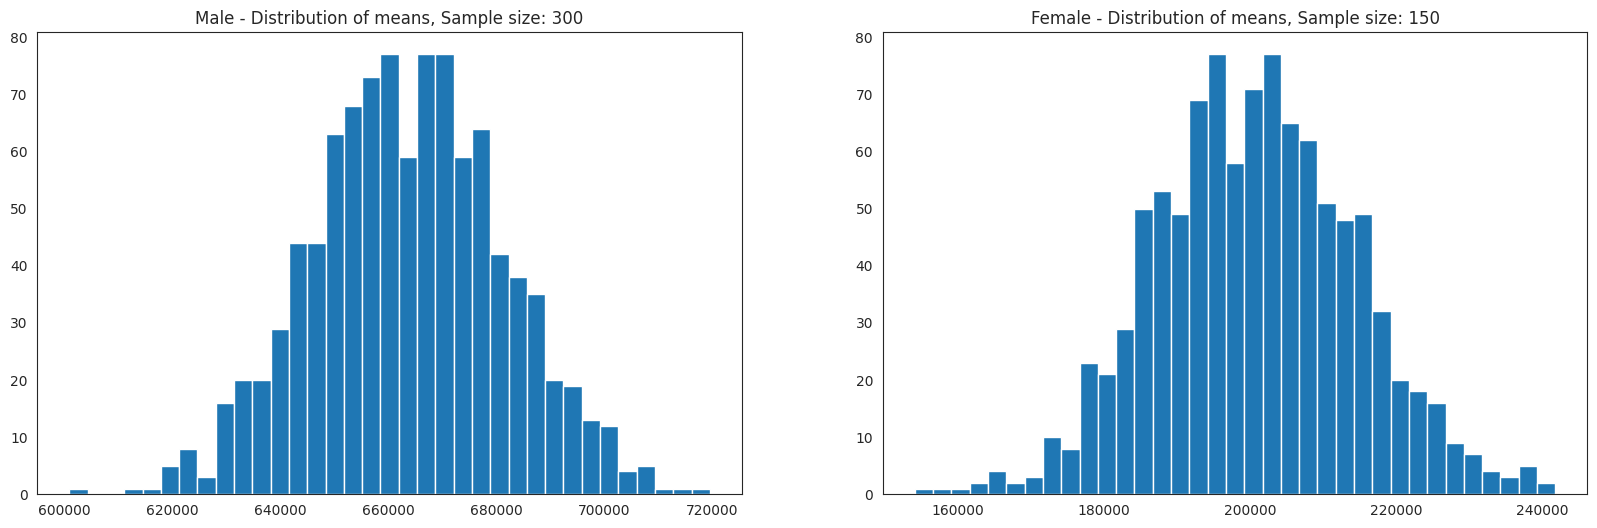

In [47]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 300")
axis[1].set_title("Female - Distribution of means, Sample size: 150")

plt.show()

In [48]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 663607.62
Population mean - Mean of sample means of amount spend for Female: 200663.49

Male - Sample mean: 663653.05 Sample std: 933096.80
Female - Sample mean: 201363.54 Sample std: 535828.17


**Sample Size:**

male_sample_size = 30000 <br>
female_sample_size = 15000

In [49]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [50]:
genders = ["M", "F"]

male_sample_size = 30000
female_sample_size = 15000
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

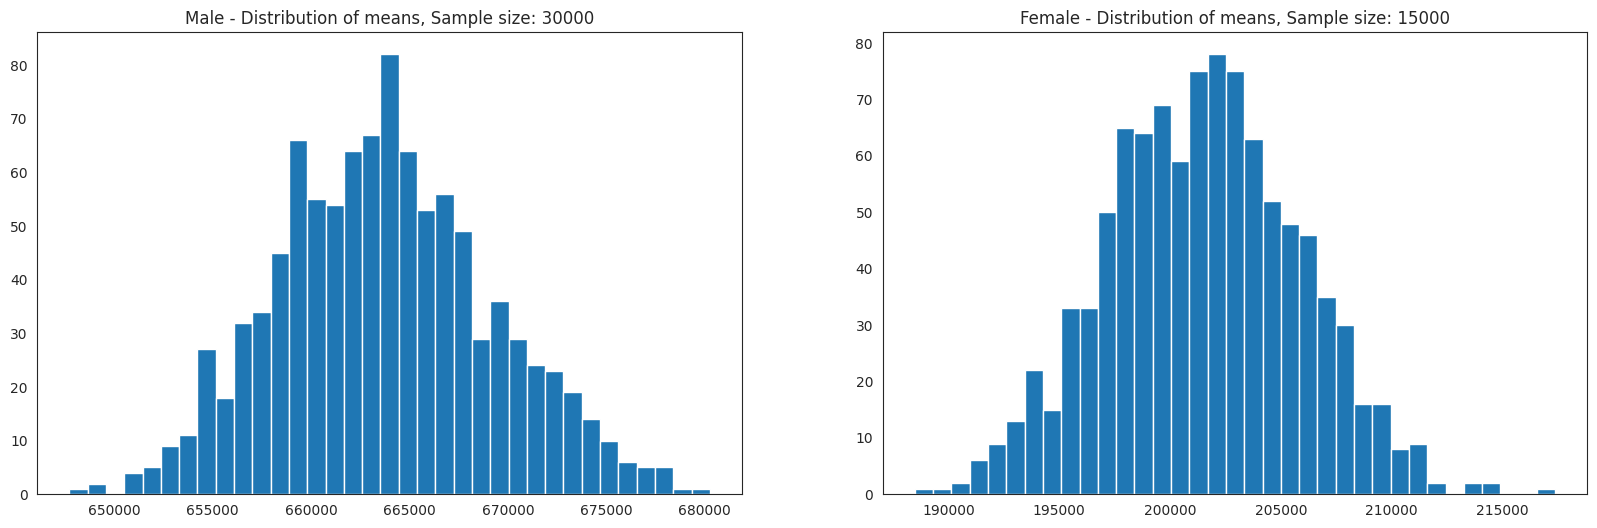

In [51]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 30000")
axis[1].set_title("Female - Distribution of means, Sample size: 15000")

plt.show()

In [52]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 663736.15
Population mean - Mean of sample means of amount spend for Female: 201467.31

Male - Sample mean: 663653.05 Sample std: 933096.80
Female - Sample mean: 201363.54 Sample std: 535828.17


**Observation:**

For sample size 300, 3000, and 30000:

Population mean - Mean of sample means of amount spend for Male:

300   -> 924972.04 <br>
3000  -> 925321.16 <br>
30000 -> 925406.43 <br>

Population mean - Mean of sample means of amount spend for Female:

150   -> 712298.71 <br>
1500  -> 711995.61 <br>
15000 -> 711949.28 <br>

We can clearly observe that Mean of sample means for different sample sizes are almost the same.


##**4.c. Is confidence intervals of average male and female spend overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)**

**Confidence Interval -> Z**

90% -> 1.645

95% -> 1.960

99% -> 2.576

**99% Confidence Interval:**

In [53]:
#99% Confidence Interval

male_margin_of_error_clt = 2.576*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 2.576*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("99% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

99% Confidence Interval:
Male confidence interval of means: (632336.20, 694969.90)
Female confidence interval of means: (183379.93, 219347.16)


**Observation:**

For 99% Confidence Interval, the range for male & female is not overlapping.

Now we can infer about the population that, **99% of the times**:

1. Average amount spend by male customer will lie in between: **(886275.20, 964413.61)**
2. Average amount spend by female customer will lie in between: **(661070.03, 762978.76)**

**95% Confidence Interval:**

In [54]:
#95% Confidence Interval

male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("95% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

95% Confidence Interval:
Male confidence interval of means: (639825.01, 687481.08)
Female confidence interval of means: (187680.36, 215046.73)


**Observation:**

For 95% Confidence Interval, the range for male & female is not overlapping.

Now we can infer about the population that, **95% of the times**:

1. Average amount spend by male customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by female customer will lie in between: **(673254.77, 750794.02)**

**90% Confidence Interval:**

In [55]:
#90% Confidence Interval

male_margin_of_error_clt = 1.645*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.645*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("90% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

90% Confidence Interval:
Male confidence interval of means: (643654.52, 683651.58)
Female confidence interval of means: (189879.45, 212847.64)


**Observation:**

For 90% Confidence Interval, the range for male & female is not overlapping.

Now we can infer about the population that, **90% of the times**:

1. Average amount spend by male customer will lie in between: **(900395.32, 950293.49)**
2. Average amount spend by female customer will lie in between: **(679485.60, 744563.19)**

##**4.d.Results when the same activity is performed for Married vs Unmarried (10 Points)**

In [56]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [57]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

/tmp/ipython-input-635137855.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()


,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000001,1,0
2,1000002,0,810472
3,1000002,1,0
4,1000003,0,341635
...,...,...,...
11777,1006038,1,0
11778,1006039,0,0
11779,1006039,1,590319
11780,1006040,0,1653299


In [58]:
amt_df['Marital_Status'].value_counts()

,count
Marital_Status,
0,5891
1,5891


**Sample Size:**

marid_samp_size = 3000 <br>
unmarid_sample_size = 2000

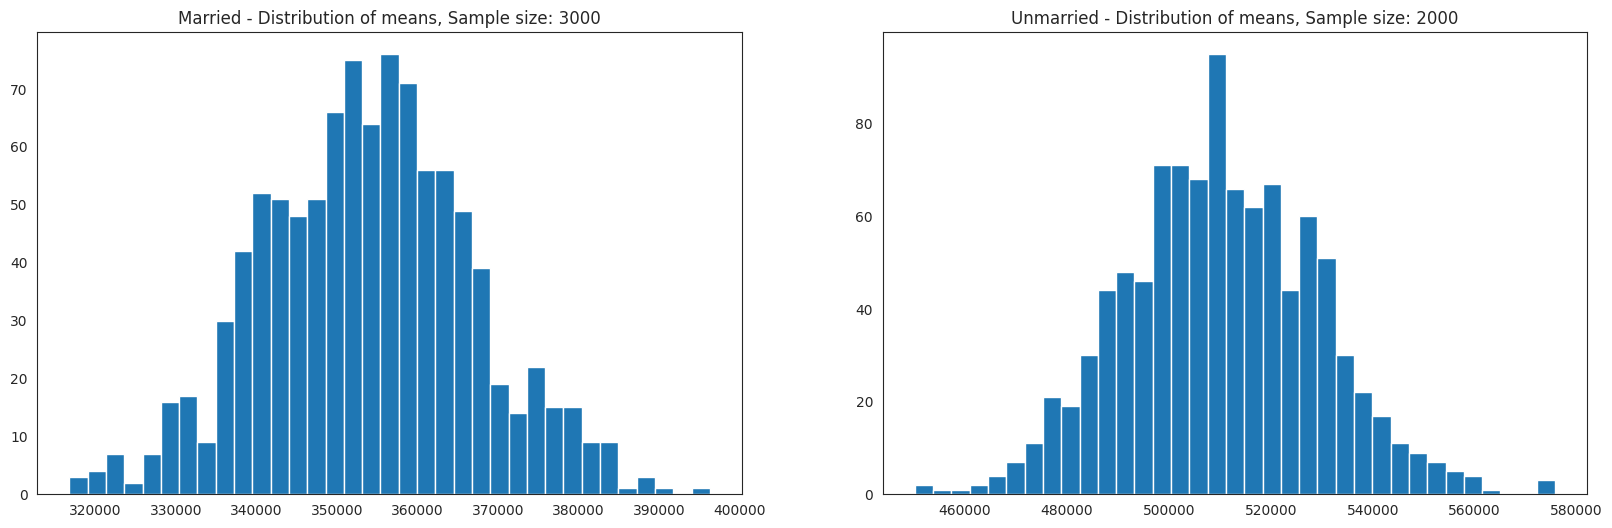

Population mean - Mean of sample means of amount spend for Married: 353760.86
Population mean - Mean of sample means of amount spend for Unmarried: 510129.26

Married - Sample mean: 354249.75 Sample std: 735314.88
Unmarried - Sample mean: 510766.84 Sample std: 843632.94


In [59]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Sample Size:**

marid_samp_size = 300 <br>
unmarid_sample_size = 200

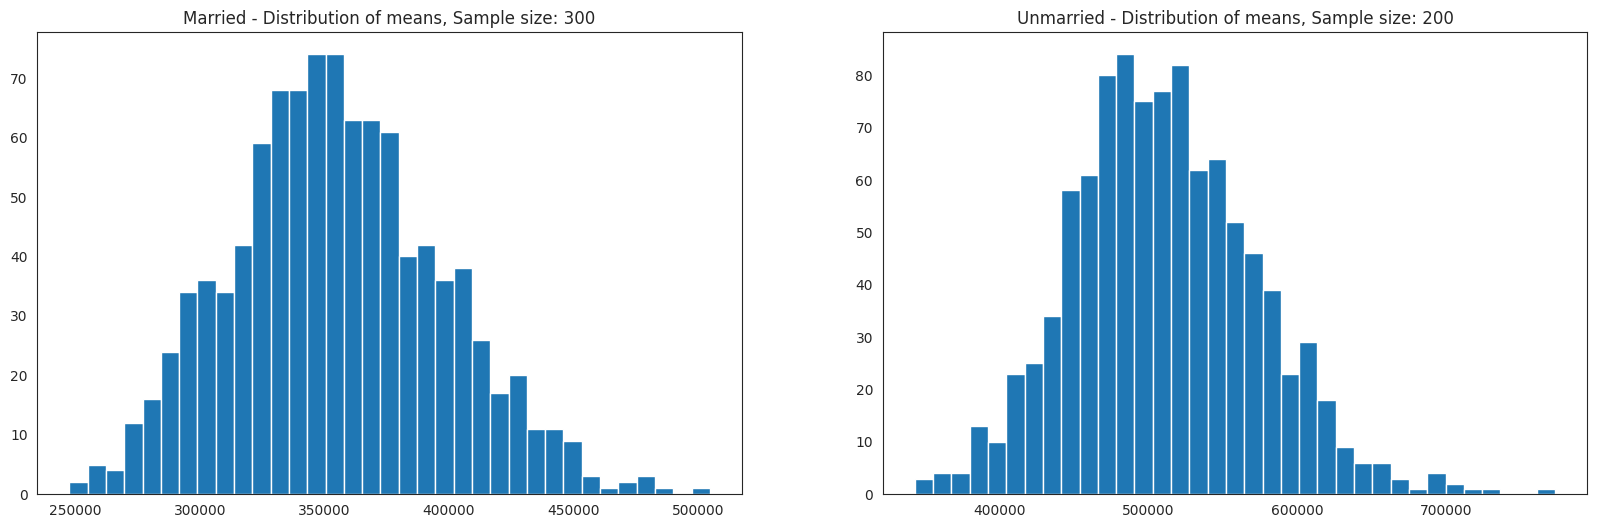

Population mean - Mean of sample means of amount spend for Married: 354812.74
Population mean - Mean of sample means of amount spend for Unmarried: 510531.62

Married - Sample mean: 354249.75 Sample std: 735314.88
Unmarried - Sample mean: 510766.84 Sample std: 843632.94


In [60]:
marid_samp_size = 300
unmarid_sample_size = 200
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 300")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 200")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Sample Size:**
    
marid_samp_size = 30000 <br>
unmarid_sample_size = 20000

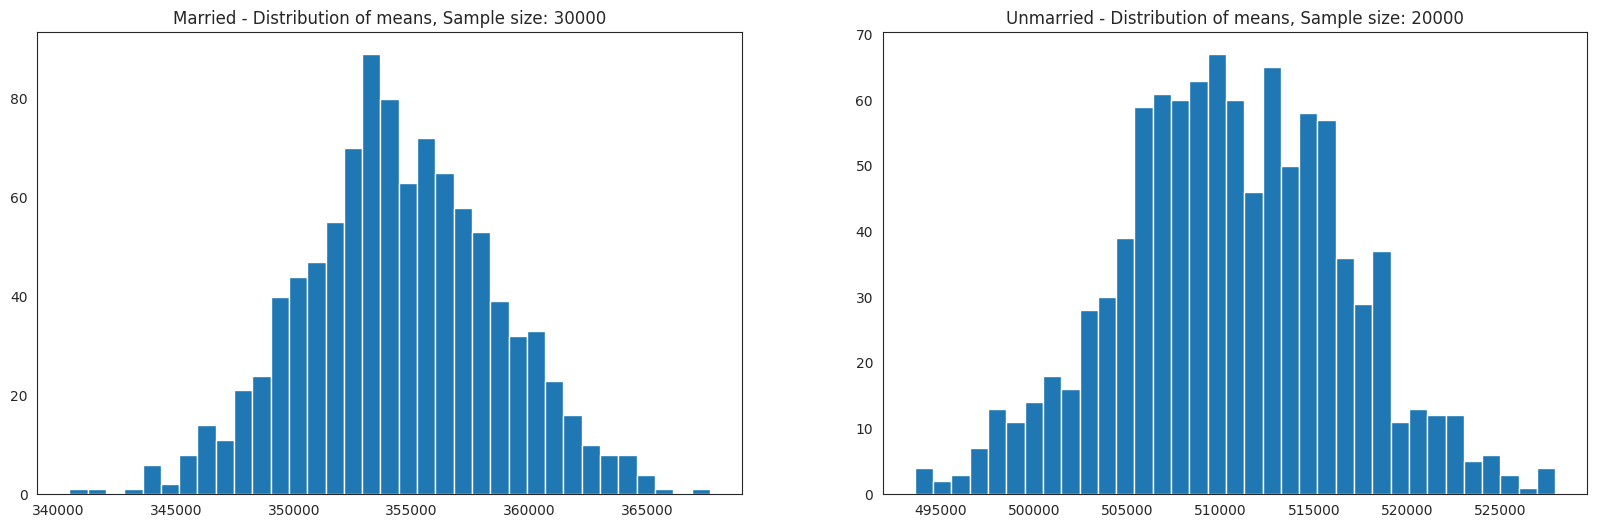

Population mean - Mean of sample means of amount spend for Married: 354475.49
Population mean - Mean of sample means of amount spend for Unmarried: 510515.87

Married - Sample mean: 354249.75 Sample std: 735314.88
Unmarried - Sample mean: 510766.84 Sample std: 843632.94


In [61]:
marid_samp_size = 30000
unmarid_sample_size = 20000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 30000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 20000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Observation:**

For sample size 300, 3000, and 30000:

Population mean - Mean of sample means of amount spend for Married:

300   -> 843184.78 <br>
3000  -> 844173.99 <br>
30000 -> 843465.84 <br>

Population mean - Mean of sample means of amount spend for Unmarried:

150   -> 879775.58 <br>
1500  -> 880847.26 <br>
15000 -> 880747.41 <br>

We can clearly observe that Mean of sample means for different sample sizes are almost the same.

**Confidence Interval -> Z**

80% -> 1.282 <br>
85% -> 1.440 <br>
90% -> 1.645 <br>
95% -> 1.960 <br>
99% -> 2.576 <br>

**99% Confidence Interval:**

In [62]:
#99% Confidence Interval

print("99% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 2.576*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

99% Confidence Interval:
Married confidence interval of means: (329570.92, 378928.59)
Unmarried confidence interval of means: (482452.60, 539081.08)


**Observation:**

For 99% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 95% and try again.

**95% Confidence Interval:**

In [63]:
#95% Confidence Interval

print("95% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

95% Confidence Interval:
Married confidence interval of means: (335472.38, 373027.13)
Unmarried confidence interval of means: (489223.40, 532310.28)


**Observation:**

For 95% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 90% and try again.

**90% Confidence Interval:**

In [64]:
#90% Confidence Interval

print("90% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.645*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

90% Confidence Interval:
Married confidence interval of means: (338490.17, 370009.34)
Unmarried confidence interval of means: (492685.74, 528847.94)


**Observation:**

For 90% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 85% and try again.

##**4.e.Results when the same activity is performed for Age (10 Points)**


### Calculating the average amount spent by Age

In [65]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

/tmp/ipython-input-2078861526.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()


,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000001,18-25,0
2,1000001,26-35,0
3,1000001,36-45,0
4,1000001,46-50,0
...,...,...,...
41232,1006040,26-35,1653299
41233,1006040,36-45,0
41234,1006040,46-50,0
41235,1006040,51-55,0


In [66]:
amt_df['Age'].value_counts()

,count
Age,
0-17,5891
18-25,5891
26-35,5891
36-45,5891
46-50,5891
51-55,5891
55+,5891


In [67]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

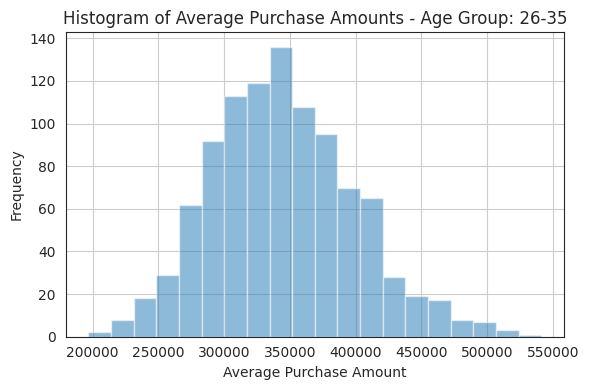

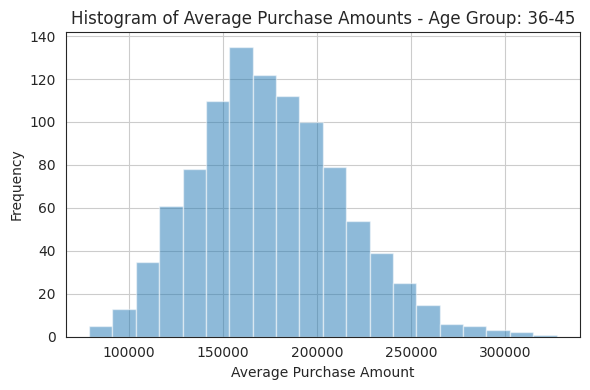

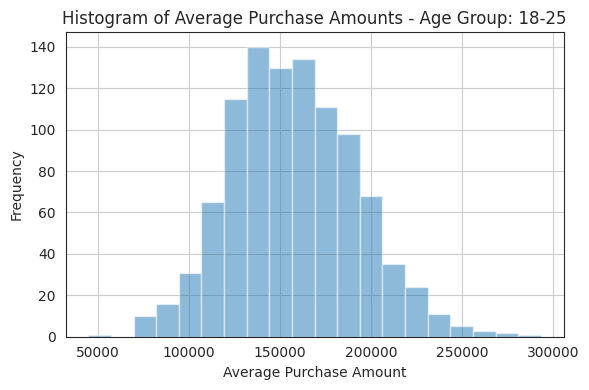

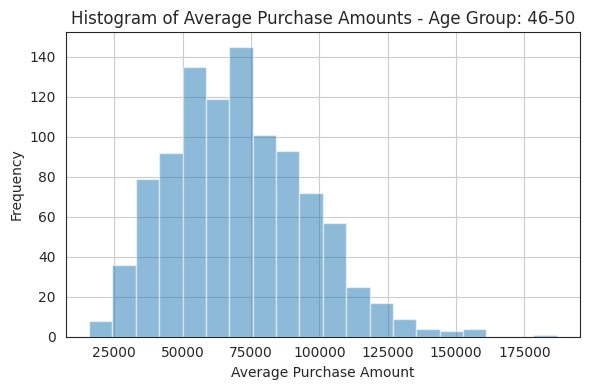

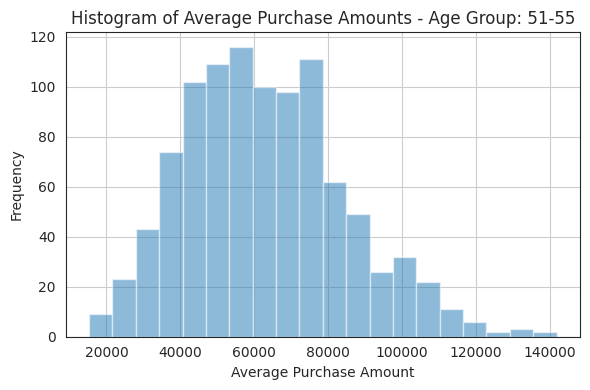

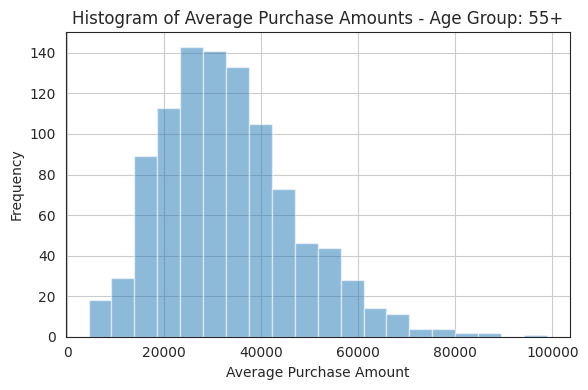

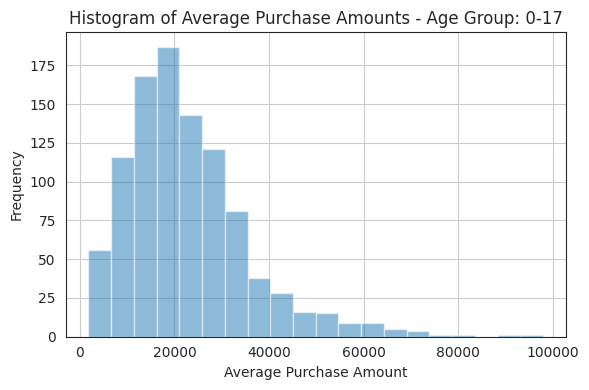

In [68]:
# Create separate histogram plots for each age group's average purchase amounts
for age_interval in age_intervals:
    plt.figure(figsize=(6, 4))  # Adjust the figure size here
    plt.hist(all_means[age_interval], bins=20, alpha=0.5)
    plt.title(f"Histogram of Average Purchase Amounts - Age Group: {age_interval}")
    plt.xlabel("Average Purchase Amount")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()  # Ensures plots are well-arranged
    plt.show()

**99% Confidence Interval:**

In [69]:
#99% Confidence Interval

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 2.576*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (319045.09, 370742.92)
For age 36-45 --> confidence interval of means: (155463.38, 193058.05)
For age 18-25 --> confidence interval of means: (138293.68, 171958.79)
For age 46-50 --> confidence interval of means: (59373.08, 83503.65)
For age 51-55 --> confidence interval of means: (51979.29, 72651.38)
For age 55+ --> confidence interval of means: (27263.77, 40896.94)
For age 0-17 --> confidence interval of means: (16988.32, 28814.83)


**95% Confidence Interval:**

In [70]:
#95% Confidence Interval

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (325226.35, 364561.66)
For age 36-45 --> confidence interval of means: (159958.40, 188563.04)
For age 18-25 --> confidence interval of means: (142318.86, 167933.62)
For age 46-50 --> confidence interval of means: (62258.26, 80618.47)
For age 51-55 --> confidence interval of means: (54450.95, 70179.72)
For age 55+ --> confidence interval of means: (28893.83, 39266.89)
For age 0-17 --> confidence interval of means: (18402.36, 27400.79)


**90% Confidence Interval:**

In [71]:
#90% Confidence Interval

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.645*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (328387.22, 361400.78)
For age 36-45 --> confidence interval of means: (162256.98, 186264.45)
For age 18-25 --> confidence interval of means: (144377.19, 165875.29)
For age 46-50 --> confidence interval of means: (63733.63, 79143.10)
For age 51-55 --> confidence interval of means: (55714.87, 68915.80)
For age 55+ --> confidence interval of means: (29727.37, 38433.34)
For age 0-17 --> confidence interval of means: (19125.45, 26677.70)


#**5. Final Insights (10 Points)- Illustrate the insights based on exploration and CLT**

# 📊 Insights 📊

## Age Distribution 🎂
- ~ 80% of the users are aged between 18-50:
    - 40%: 26-35 📅
    - 18%: 18-25 🎈
    - 20%: 36-45 🗓️
    
## Gender Ratio 👫
- 75% of the users are Male ♂️ and 25% are Female ♀️
    
## Marital Status 👩‍❤️‍👨
- 60% are Single 👤 and 40% are Married 👫
    
## City Residency 🏙️
- 35% have been staying in the city for 1 year 🏠
- 18% have been staying for 2 years 🏠🏠
- 17% have been staying for 3 years 🏠🏠🏠
    
## Product Categories 🛍️
- Total of 20 product categories available 📦
    
## Occupations 💼
- 20 different types of occupations in the city 👔

## User Demographics 📊
- Most users are Male ♂️
- 20 different types of Occupations and Product Categories 📋
- Majority of users belong to City Category B 🏙️
- More users are Single compared to Married 👤 vs 👫
- Product Categories 1, 5, 8, & 11 have the highest purchasing frequency 🛒🔝

## Average Spending 💰
- Average amount spent by Male customers: ₹925,344.40 💸
- Average amount spent by Female customers: ₹712,024.39 💸

## Confidence Intervals 📈

## Gender-wise

Now using the **Central Limit Theorem** for the **population**:

1. Average amount spend by **male** customers is **9,26,341.86**
2. Average amount spend by **female** customers is **7,11,704.09**

For **99% Confidence Interval**: <br>
Now we can infer about the population that, **99% of the times**:

1. Average amount spend by male customer will lie in between: **(886275.20, 964413.61)**
2. Average amount spend by female customer will lie in between: **(661070.03, 762978.76)**


## Marital Status-wise

Now using the **Central Limit Theorem** for the **population**:

1. Average amount spend by **Married** customers is **844173.99**
2. Average amount spend by **Unmarried** customers is **880847.26**
  

For **80% Confidence Interval**: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
But the overlapping has significantly reduced.

Now we can infer about the population that, **80% of the times**:

1. Average amount spend by Married customer will lie in between: **(819418.68, 867634.91)**
2. Average amount spend by Unmarried customer will lie in between: **(859753.36, 901398.21)**

## Age-wise

For **90% Confidence Interval**: <br>

1. For **age 26-35** --> confidence interval of means: **(952206.28, 1027112.35)**
2. For **age 36-45** --> confidence interval of means: **(832398.89, 926932.53)**
3. For **age 18-25** --> confidence interval of means: **(810187.65, 899538.59)**
4. For **age 46-50** --> confidence interval of means: **(726209.00, 858888.57)**
5. For **age 51-55** --> confidence interval of means: **(703772.36, 822629.48)**
6. For **age 55+** --> confidence interval of means: **(487032.92, 592361.57)**
7. For **age 0-17** --> confidence interval of means: **(542320.46, 695415.16)**


#**6.Recommendations**:

 - **Targeted marketing**: Since the majority of transactions are made by males, it would be beneficial to tailor marketing strategies to cater to their preferences and needs. This could include specific promotions, product offerings, or advertising campaigns designed to attract male customers.

 - **Focus on popular occupations**: Given that 82.33% of transactions come from customers in 11 specific occupations, it would be wise to focus marketing efforts on these occupations. Understanding the needs and preferences of individuals in these occupations can help in creating targeted marketing campaigns and customized offers.

 - **Engage with new residents**: As a significant portion of transactions (53.75%) come from customers who have recently moved to the current city, it presents an opportunity to engage with these new residents. Targeted marketing, welcoming offers, and incentives for newcomers can help capture their loyalty and increase their spending.

 - **Emphasize popular product categories**: Since 82.43% of transactions are concentrated in just five product categories, allocating resources and promotions towards these categories can maximize sales potential. Highlighting these popular categories and offering attractive deals can encourage more purchases.

 - **Increase focus on single customers**: Given that 59.05% of total revenue is generated by single customers, dedicating efforts to cater to their needs and preferences can help drive more sales. Understanding their motivations and targeting them with personalized offers can enhance their shopping experience and loyalty.

 - **Optimize revenue from specific age groups**: Since a majority of transactions are made by customers between the ages of 26 and 45, it is important to focus marketing efforts on this demographic. Offering products and services that align with their interests and values can maximize revenue generation.

 - **Location-based marketing**: With a significant number of customers belonging to specific cities, tailoring marketing strategies to target these locations can lead to better results. Allocating resources, promotions, and events based on the customer concentration in each city can help drive sales.

 - **Emphasize top-selling product categories**: The top five product categories generate a substantial portion of total revenue. Investing in these categories, ensuring a wide range of options and competitive pricing, can capitalize on customer demand and drive overall sales.

 - **Personalized offers for high spenders**: Identifying customers with high total spending, such as males or customers in specific age groups, allows for targeted marketing and personalized offers. Providing exclusive discounts, loyalty rewards, or special privileges to these customers can encourage repeat purchases and increase customer satisfaction.

 - **Implement loyalty program**: Implementating a loyalty program that offers incentives, rewards, and exclusive deals to encourage repeat purchases and increase customer retention. Targeted loyalty programs can be designed for male customers, single customers, and customers in specific age groups.

 - **Enhance product offerings**: Analyze the popular product categories and identify opportunities to expand the product range within those categories. This can attract more customers and increase sales. Additionally, identify complementary products or cross-selling opportunities to encourage customers to make additional purchases.

 - **Customer engagement**: Implement targeted marketing campaigns and communication strategies to engage customers regularly. This can include personalized email campaigns, social media engagement, and special promotions tailored to different customer segments. Keeping customers informed about new products, offers, and events can increase their engagement and encourage them to make more purchases.

 - **Collaborations and partnerships**: Explore collaborations with popular brands or influencers that resonate with the target customer segments. These collaborations can help attract new customers, create buzz, and increase brand visibility. It can also provide opportunities for joint promotions or exclusive offers.

 - **Seasonal and event-based promotions**: Leverage seasonal events, holidays, and special occasions to offer targeted promotions and discounts. Aligning marketing campaigns and product offerings with these events can create a sense of urgency and drive sales.

 - **Customer feedback and reviews**: Actively seek feedback from customers to understand their preferences, pain points, and suggestions for improvement. Encourage customers to leave reviews and ratings to build social proof and credibility. Utilize this feedback to make necessary improvements and refine the customer experience.

 - **Personalization and customization**: Invest in technology and data analytics to provide personalized recommendations, product suggestions, and customized offers based on individual customer preferences and past purchase history. This level of personalization can enhance the customer experience and increase conversion rates.

 - **Competitive pricing and promotions**: Continuously monitor competitors' pricing and promotional activities to ensure competitiveness. Offer price-match guarantees or price comparison tools to instill confidence in customers that they are getting the best value for their purchases.
